# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

/Users/diane/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# data source https://www.kaggle.com/rtatman/188-million-us-wildfires
data = pd.read_csv('fires.csv')

<ipython-input-2-03c3e46369cd>:2: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('fires.csv')


# 2. EDA & Data Cleanup

In [3]:
data.head()

,1,1.1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest.1,...,A,40.03694444,-121.00583333,5,USFS,CA,63,063,Plumas,Unnamed: 38
0,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.933056,-120.404444,5,USFS,CA,61.0,61.0,Placer,NaN
1,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.984167,-120.735556,13,STATE OR PRIVATE,CA,17.0,17.0,El Dorado,NaN
2,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559167,-119.913333,5,USFS,CA,3.0,3.0,Alpine,NaN
3,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559167,-119.933056,5,USFS,CA,3.0,3.0,Alpine,NaN
4,6,6,FS-1418849,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.635278,-120.103611,5,USFS,CA,5.0,5.0,Amador,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880464 entries, 0 to 1880463
Data columns (total 39 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   1                         int64  
 1   1.1                       int64  
 2   FS-1418826                object 
 3   FED                       object 
 4   FS-FIRESTAT               object 
 5   FS                        object 
 6   USCAPNF                   object 
 7   Plumas National Forest    object 
 8   0511                      object 
 9   Plumas National Forest.1  object 
 10  1.2                       object 
 11  PNF-47                    object 
 12  BJ8K                      object 
 13  FOUNTAIN                  object 
 14  Unnamed: 14               object 
 15  Unnamed: 15               object 
 16  Unnamed: 16               object 
 17  Unnamed: 17               object 
 18  Unnamed: 18               object 
 19  2005                      int64  
 20  2453403.5               

In [5]:
data.describe()

,1,1.1,2005,2453403.5,33,1300,9,2453403.5.1,33.1,1730,0.1,40.03694444,-121.00583333,5,063,Unnamed: 38
count,1.880464e+06,1.880464e+06,1.880464e+06,1.880464e+06,1.880464e+06,997826.000000,1.880464e+06,9.889330e+05,988933.000000,907911.000000,1.880464e+06,1.880464e+06,1.880464e+06,1.880464e+06,1.202316e+06,0.0
mean,9.402335e+05,5.484023e+07,2.003710e+03,2.453064e+06,1.647192e+02,1453.014479,5.979035e+00,2.453238e+06,172.656907,1534.831865,7.452020e+01,3.678121e+01,-9.570493e+01,1.059658e+01,9.578353e+01,NaN
std,5.428433e+05,1.011963e+08,6.663100e+00,2.434574e+03,9.003888e+01,405.961137,3.483860e+00,2.687549e+03,84.320273,432.737884,2.497599e+03,6.139032e+00,1.671694e+01,4.404661e+00,9.861509e+01,NaN
min,2.000000e+00,2.000000e+00,1.992000e+03,2.448622e+06,1.000000e+00,0.000000,1.000000e+00,2.448622e+06,1.000000,0.000000,1.000000e-05,1.793972e+01,-1.788026e+02,0.000000e+00,1.000000e+00,NaN
25%,4.701178e+05,5.055008e+05,1.998000e+03,2.451084e+06,8.900000e+01,1240.000000,3.000000e+00,2.450700e+06,102.000000,1310.000000,1.000000e-01,3.281860e+01,-1.103632e+02,8.000000e+00,2.900000e+01,NaN
50%,9.402335e+05,1.067762e+06,2.004000e+03,2.453178e+06,1.640000e+02,1457.000000,5.000000e+00,2.453466e+06,181.000000,1600.000000,1.000000e+00,3.545250e+01,-9.204293e+01,1.400000e+01,6.700000e+01,NaN
75%,1.410349e+06,1.910639e+07,2.009000e+03,2.455036e+06,2.300000e+02,1708.000000,9.000000e+00,2.455754e+06,232.000000,1810.000000,3.300000e+00,4.082720e+01,-8.229760e+01,1.400000e+01,1.210000e+02,NaN
max,1.880465e+06,3.003484e+08,2.015000e+03,2.457388e+06,3.660000e+02,2359.000000,1.300000e+01,2.457392e+06,366.000000,2359.000000,6.069450e+05,7.033060e+01,-6.525694e+01,1.500000e+01,8.100000e+02,NaN


In [6]:
data.columns.isna()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [7]:
print(data.columns)

Index(['1', '1.1', 'FS-1418826', 'FED', 'FS-FIRESTAT', 'FS', 'USCAPNF',
       'Plumas National Forest', '0511', 'Plumas National Forest.1', '1.2',
       'PNF-47', 'BJ8K', 'FOUNTAIN', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', '2005', '2453403.5', '33',
       '1300', '9', 'Miscellaneous', '2453403.5.1', '33.1', '1730', '0.1', 'A',
       '40.03694444', '-121.00583333', '5', 'USFS', 'CA', '63', '063',
       'Plumas', 'Unnamed: 38'],
      dtype='object')


# 2.1 Column Name Cleanup

In [8]:
data = data.drop(columns=["1", "1.1"])

In [9]:
data.columns = ["FOD_ID", "FPA_ID", "SOURCESYSTEMTYPE", "SOURCESYSTEM", "NWCGREPORTINGAGENCY", "NWCGREPORTINGUNIT_ID", "SOURCEREPORTINGUNIT_NAME", "LOCALFIREREPORT_ID", "LOCALINCIDENTID", "FIRE_CODE", "FIRE_NAME", "ICS209INCIDENT_NUMBER", "ICS209NAME", "MTBS_ID", "MTBSFIRENAME", "COMPLEX_NAME", "EMPTY", "FIRE_YEAR", "DISCOVERY_DATE", "DISCOVERY_DOY", "DISCOVERY_TIME", "STATCAUSECODE", "STATCAUSEDESCR", "CONT_DATE", "CONT_DOY", "CONT_TIME", "FIRE_SIZE", "FIRESIZECLASS", "LATITUDE", "LONGITUDE", "OWNER_CODE", "OWNER_DESCR", "STATE", "DELETE!","DELETE", "DELETE2", "DELETE3"]

In [10]:
data = data.drop(columns=["DELETE!", "DELETE", "DELETE2", "DELETE3"])

In [11]:
data.head()

,FOD_ID,FPA_ID,SOURCESYSTEMTYPE,SOURCESYSTEM,NWCGREPORTINGAGENCY,NWCGREPORTINGUNIT_ID,SOURCEREPORTINGUNIT_NAME,LOCALFIREREPORT_ID,LOCALINCIDENTID,FIRE_CODE,...,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRESIZECLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE
0,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,13,...,2453137.5,133.0,1530.0,0.25,A,38.933056,-120.404444,5,USFS,CA
1,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,021,...,2453156.5,152.0,2024.0,0.10,A,38.984167,-120.735556,13,STATE OR PRIVATE,CA
2,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,6,...,2453189.5,185.0,1400.0,0.10,A,38.559167,-119.913333,5,USFS,CA
3,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,7,...,2453189.5,185.0,1200.0,0.10,A,38.559167,-119.933056,5,USFS,CA
4,FS-1418849,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,54,8,...,2453187.5,183.0,1600.0,0.10,A,38.635278,-120.103611,5,USFS,CA


In [12]:
print(data.columns)

Index(['FOD_ID', 'FPA_ID', 'SOURCESYSTEMTYPE', 'SOURCESYSTEM',
       'NWCGREPORTINGAGENCY', 'NWCGREPORTINGUNIT_ID',
       'SOURCEREPORTINGUNIT_NAME', 'LOCALFIREREPORT_ID', 'LOCALINCIDENTID',
       'FIRE_CODE', 'FIRE_NAME', 'ICS209INCIDENT_NUMBER', 'ICS209NAME',
       'MTBS_ID', 'MTBSFIRENAME', 'COMPLEX_NAME', 'EMPTY', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STATCAUSECODE',
       'STATCAUSEDESCR', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE',
       'FIRESIZECLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR',
       'STATE'],
      dtype='object')


# 2.2 Visualizations

<AxesSubplot:xlabel='FIRE_YEAR', ylabel='Count'>

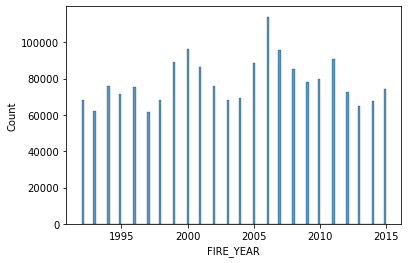

In [13]:
sns.histplot(data["FIRE_YEAR"])

<AxesSubplot:xlabel='DISCOVERY_DOY', ylabel='Count'>

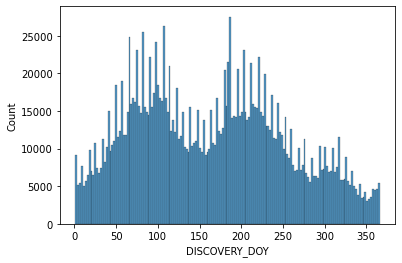

In [14]:
sns.histplot(data["DISCOVERY_DOY"])

/Users/diane/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='STATE', ylabel='count'>

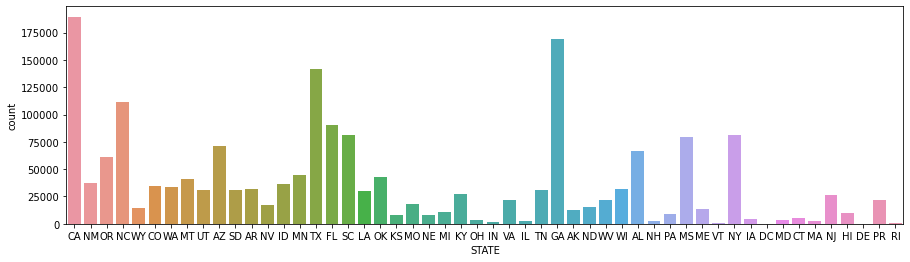

In [15]:
plt.figure(figsize=(15,4))
sns.countplot(data["STATE"])

<AxesSubplot:xlabel='STATE', ylabel='FIRE_SIZE'>

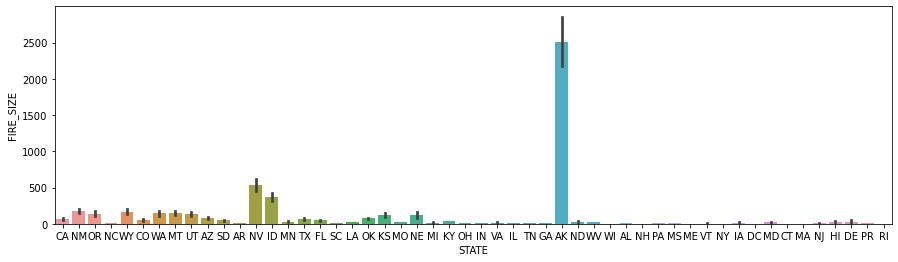

In [16]:
plt.figure(figsize=(15,4))
sns.barplot(data=data, x=data["STATE"], y=data["FIRE_SIZE"])

<AxesSubplot:xlabel='FIRE_YEAR', ylabel='FIRE_SIZE'>

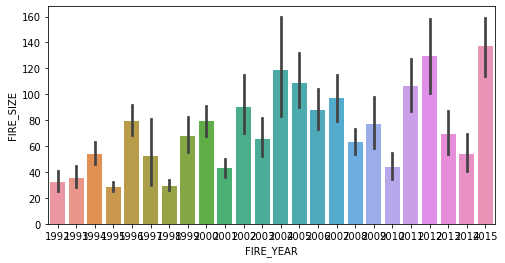

In [17]:
plt.figure(figsize=(8,4))
sns.barplot(data=data, x=data["FIRE_YEAR"], y=data["FIRE_SIZE"])

# 2.3 Drop Columns

In [18]:
data.isna().sum()


FOD_ID                            0
FPA_ID                            0
SOURCESYSTEMTYPE                  0
SOURCESYSTEM                      0
NWCGREPORTINGAGENCY               0
NWCGREPORTINGUNIT_ID              0
SOURCEREPORTINGUNIT_NAME          0
LOCALFIREREPORT_ID                0
LOCALINCIDENTID             1459286
FIRE_CODE                    820821
FIRE_NAME                   1555741
ICS209INCIDENT_NUMBER        960479
ICS209NAME                  1854747
MTBS_ID                     1854747
MTBSFIRENAME                1869461
COMPLEX_NAME                1869461
EMPTY                       1875281
FIRE_YEAR                         0
DISCOVERY_DATE                    0
DISCOVERY_DOY                     0
DISCOVERY_TIME               882638
STATCAUSECODE                     0
STATCAUSEDESCR                    0
CONT_DATE                    891531
CONT_DOY                     891531
CONT_TIME                    972553
FIRE_SIZE                         0
FIRESIZECLASS               

In [19]:
data = data.drop(columns=["EMPTY","LOCALINCIDENTID", "FIRE_CODE","FIRE_NAME","ICS209INCIDENT_NUMBER", "ICS209NAME", "MTBS_ID","MTBSFIRENAME","COMPLEX_NAME", "CONT_DATE", "CONT_DOY", "CONT_TIME"])

In [20]:
print(data.columns)

Index(['FOD_ID', 'FPA_ID', 'SOURCESYSTEMTYPE', 'SOURCESYSTEM',
       'NWCGREPORTINGAGENCY', 'NWCGREPORTINGUNIT_ID',
       'SOURCEREPORTINGUNIT_NAME', 'LOCALFIREREPORT_ID', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STATCAUSECODE',
       'STATCAUSEDESCR', 'FIRE_SIZE', 'FIRESIZECLASS', 'LATITUDE', 'LONGITUDE',
       'OWNER_CODE', 'OWNER_DESCR', 'STATE'],
      dtype='object')


In [21]:
data.dtypes

FOD_ID                       object
FPA_ID                       object
SOURCESYSTEMTYPE             object
SOURCESYSTEM                 object
NWCGREPORTINGAGENCY          object
NWCGREPORTINGUNIT_ID         object
SOURCEREPORTINGUNIT_NAME     object
LOCALFIREREPORT_ID           object
FIRE_YEAR                     int64
DISCOVERY_DATE              float64
DISCOVERY_DOY                 int64
DISCOVERY_TIME              float64
STATCAUSECODE                 int64
STATCAUSEDESCR               object
FIRE_SIZE                   float64
FIRESIZECLASS                object
LATITUDE                    float64
LONGITUDE                   float64
OWNER_CODE                    int64
OWNER_DESCR                  object
STATE                        object
dtype: object

# 2.4 Convert Dates

In [22]:
data["DISCOVERY_TIME"]

0           845.0
1          1921.0
2          1600.0
3          1600.0
4          1800.0
            ...  
1880459    1726.0
1880460     126.0
1880461    2052.0
1880462    2309.0
1880463    2128.0
Name: DISCOVERY_TIME, Length: 1880464, dtype: float64

<AxesSubplot:xlabel='DISCOVERY_TIME', ylabel='Count'>

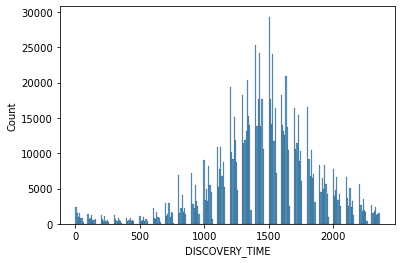

In [23]:
sns.histplot(data["DISCOVERY_TIME"])

In [24]:
data["DISCOVERY_DOY"]

0          133
1          152
2          180
3          180
4          182
          ... 
1880459    269
1880460    278
1880461    122
1880462    287
1880463     73
Name: DISCOVERY_DOY, Length: 1880464, dtype: int64

In [25]:
data["DISCOVERY_DATE"]

0          2453137.5
1          2453156.5
2          2453184.5
3          2453184.5
4          2453186.5
             ...    
1880459    2457291.5
1880460    2457300.5
1880461    2457144.5
1880462    2457309.5
1880463    2457095.5
Name: DISCOVERY_DATE, Length: 1880464, dtype: float64

In [26]:
data["FIRE_YEAR"]

0          2004
1          2004
2          2004
3          2004
4          2004
           ... 
1880459    2015
1880460    2015
1880461    2015
1880462    2015
1880463    2015
Name: FIRE_YEAR, Length: 1880464, dtype: int64

In [27]:
data["Julian_Date"] = data["FIRE_YEAR"].astype(str) + data["DISCOVERY_DOY"].astype(str)
data["Julian_Date"]

0          2004133
1          2004152
2          2004180
3          2004180
4          2004182
            ...   
1880459    2015269
1880460    2015278
1880461    2015122
1880462    2015287
1880463     201573
Name: Julian_Date, Length: 1880464, dtype: object

In [28]:
# code from: https://rafatieppo.github.io/post/2018_12_01_juliandate/ 
def julian_date_converter(julian_date):
    date_format = '%Y%j'
    converted_date = datetime.datetime.strptime(julian_date, date_format).date()
    return converted_date

In [29]:
data['Converted_Date'] = data['Julian_Date'].map(lambda x: julian_date_converter(x))
data['Converted_Date'] 

0          2004-05-12
1          2004-05-31
2          2004-06-28
3          2004-06-28
4          2004-06-30
              ...    
1880459    2015-09-26
1880460    2015-10-05
1880461    2015-05-02
1880462    2015-10-14
1880463    2015-03-14
Name: Converted_Date, Length: 1880464, dtype: object

In [30]:
data["DISOVERY_MONTH"] = data['Julian_Date'].map(lambda x: julian_date_converter(x).month)
data["DISOVERY_DAY"] = data['Julian_Date'].map(lambda x: julian_date_converter(x).day)

In [31]:
data["DISOVERY_MONTH"]

0           5
1           5
2           6
3           6
4           6
           ..
1880459     9
1880460    10
1880461     5
1880462    10
1880463     3
Name: DISOVERY_MONTH, Length: 1880464, dtype: int64

In [32]:
data["DISOVERY_DAY"]

0          12
1          31
2          28
3          28
4          30
           ..
1880459    26
1880460     5
1880461     2
1880462    14
1880463    14
Name: DISOVERY_DAY, Length: 1880464, dtype: int64

In [33]:
data.columns

Index(['FOD_ID', 'FPA_ID', 'SOURCESYSTEMTYPE', 'SOURCESYSTEM',
       'NWCGREPORTINGAGENCY', 'NWCGREPORTINGUNIT_ID',
       'SOURCEREPORTINGUNIT_NAME', 'LOCALFIREREPORT_ID', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STATCAUSECODE',
       'STATCAUSEDESCR', 'FIRE_SIZE', 'FIRESIZECLASS', 'LATITUDE', 'LONGITUDE',
       'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'Julian_Date', 'Converted_Date',
       'DISOVERY_MONTH', 'DISOVERY_DAY'],
      dtype='object')

In [34]:
data.head()

,FOD_ID,FPA_ID,SOURCESYSTEMTYPE,SOURCESYSTEM,NWCGREPORTINGAGENCY,NWCGREPORTINGUNIT_ID,SOURCEREPORTINGUNIT_NAME,LOCALFIREREPORT_ID,FIRE_YEAR,DISCOVERY_DATE,...,FIRESIZECLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,Julian_Date,Converted_Date,DISOVERY_MONTH,DISOVERY_DAY
0,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,2004,2453137.5,...,A,38.933056,-120.404444,5,USFS,CA,2004133,2004-05-12,5,12
1,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,2004,2453156.5,...,A,38.984167,-120.735556,13,STATE OR PRIVATE,CA,2004152,2004-05-31,5,31
2,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,2004,2453184.5,...,A,38.559167,-119.913333,5,USFS,CA,2004180,2004-06-28,6,28
3,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,2004,2453184.5,...,A,38.559167,-119.933056,5,USFS,CA,2004180,2004-06-28,6,28
4,FS-1418849,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,2004,2453186.5,...,A,38.635278,-120.103611,5,USFS,CA,2004182,2004-06-30,6,30


# 2.5 Drop Columns for Dummy Variables

In [35]:
data["FOD_ID"].value_counts() # can drop

SFO-2015CACDFLNU003791     2
FS-1452833                 2
ICS209_2009_KS-DDQ-128     2
FS-1418827                 1
SFO-GA-FY2002-Dodge-092    1
                          ..
SFO-TX02240706-32931       1
SFO-TX02240706-32930       1
SFO-TX02240706-32928       1
SFO-TX02240706-32927       1
2015CAIRS26733926          1
Name: FOD_ID, Length: 1880461, dtype: int64

In [36]:
data["FPA_ID"].value_counts() # can turn to dummy variables 

NONFED       1362148
FED           481105
INTERAGCY      37211
Name: FPA_ID, dtype: int64

In [37]:
data["SOURCESYSTEMTYPE"].value_counts() # can drop

ST-NASF        711236
DOI-WFMI       241423
FS-FIRESTAT    220355
ST-CACDF        87355
ST-NCNCS        65695
ST-GAGAS        65061
ST-MSMSS        60513
ST-TXTXS        57945
ST-ALALS        54951
ST-SCSCS        49281
ST-FLFLS        45077
IA-PRIITF       21802
FWS-FMIS        19327
ST-ORORS        18121
ST-LALAS        16172
ST-OKOKS        15397
ST-TNTNS        14777
ST-WIWIS        14323
ST-ARARS        11303
ST-VAVAS        10575
ST-MOMOS         9835
IA-HIWMO         9714
ST-WAWAS         9648
ST-MEMES         7252
ST-KYKYS         6519
ST-UTUTS         4470
ST-NMNMS         4433
IA-AKACC         3713
ST-AZAZS         3446
FA-NFIRS         3387
ST-CTCTS         3379
ST-SDSDS         3181
ST-MTMTS         2737
ST-COCOS         2433
ST-MIMIS         2139
IA-ICS209        1983
ST-WYWYS         1489
ST-NENES           17
Name: SOURCESYSTEMTYPE, dtype: int64

In [38]:
data["SOURCESYSTEM"].value_counts() # turn to dummy variables 

ST/C&L    1377090
FS         220496
BIA        119943
BLM         97034
IA          21841
NPS         20893
FWS         19331
TRIBE        3739
DOD            81
BOR            14
DOE             2
Name: SOURCESYSTEM, dtype: int64

In [39]:
data["NWCGREPORTINGAGENCY"].value_counts() # can drop

USGAGAS    167123
USTXTXS    111362
USNCNCS    107424
USFLFLS     83024
USSCSCS     78977
            ...  
USKSSTX         1
USKSSNX         1
USKSLGX         1
USKSGLX         1
USTNLHR         1
Name: NWCGREPORTINGAGENCY, Length: 1640, dtype: int64

In [40]:
data["NWCGREPORTINGUNIT_ID"].value_counts() # can drop

Georgia Forestry Commission                      167123
Texas A & M Forest Service                       111362
North Carolina Forest Service                    107424
Florida Forest Service                            83024
South Carolina Forestry Commission                78977
                                                  ...  
Oregon Coast National Wildlife Refuge Complex         1
Coleman National Fish Hatchery                        1
Steigerwald Lake National Wildlife Refuge             1
Cedar Breaks National Monument                        1
Fort Matanzas National Monument                       1
Name: NWCGREPORTINGUNIT_ID, Length: 1635, dtype: int64

In [41]:
data['SOURCEREPORTINGUNIT_NAME'].value_counts() # can drop

GAGAS      97844
SCSCS      52064
TXTXS      40366
FLFLS      37945
NCNCS      37255
           ...  
UTTIP          1
03221          1
UTCBP          1
NY0605         1
USSDSLR        1
Name: SOURCEREPORTINGUNIT_NAME, Length: 5116, dtype: int64

In [42]:
data['LOCALFIREREPORT_ID'].value_counts() # can drop

Georgia Forestry Commission                97844
Fire Department of New York                75461
South Carolina Forestry Commission         52064
Mississippi Forestry Commission            46396
Texas Forest Service                       42675
                                           ...  
MINGO NWR                                      1
Eagle Mountain VFD                             1
Slade National Wildlife Refuge                 1
Chase Lake National Wildlife Refuge            1
BENTON LAKE WETLAND MANAGEMENT DISTRICT        1
Name: LOCALFIREREPORT_ID, Length: 4441, dtype: int64

In [43]:
data['STATCAUSECODE'].value_counts() # drop because same as STATCAUSEDESCR 

5     429028
9     323804
7     281455
1     278468
13    166723
2     147612
4      76139
8      61167
3      52869
6      33455
11     14448
10     11500
12      3796
Name: STATCAUSECODE, dtype: int64

In [44]:
data["STATCAUSEDESCR"].value_counts() # turn to dummy variables

Debris Burning       429028
Miscellaneous        323804
Arson                281455
Lightning            278468
Missing/Undefined    166723
Equipment Use        147612
Campfire              76139
Children              61167
Smoking               52869
Railroad              33455
Powerline             14448
Fireworks             11500
Structure              3796
Name: STATCAUSEDESCR, dtype: int64

In [45]:
data["FIRESIZECLASS"].value_counts() # turn to dummy variables

B    939376
A    666918
C    220077
D     28427
E     14107
F      7786
G      3773
Name: FIRESIZECLASS, dtype: int64

In [46]:
data["OWNER_CODE"].value_counts() # can drop because same as OWNER_DESCR

14    1050835
8      314822
5      188337
2      106819
13      71881
1       63278
7       30790
3       17524
4       12191
9        8952
6        6452
12       4236
15       2206
11       1841
10        285
0          15
Name: OWNER_CODE, dtype: int64

In [47]:
data["OWNER_DESCR"].value_counts() #  turn to dummy variables

MISSING/NOT SPECIFIED    1050835
PRIVATE                   314822
USFS                      188337
BIA                       106819
STATE OR PRIVATE           71881
BLM                        63278
STATE                      30790
NPS                        17524
FWS                        12191
TRIBAL                      8952
OTHER FEDERAL               6452
MUNICIPAL/LOCAL             4236
UNDEFINED FEDERAL           2206
COUNTY                      1841
BOR                          285
FOREIGN                       15
Name: OWNER_DESCR, dtype: int64

In [48]:
data.columns

Index(['FOD_ID', 'FPA_ID', 'SOURCESYSTEMTYPE', 'SOURCESYSTEM',
       'NWCGREPORTINGAGENCY', 'NWCGREPORTINGUNIT_ID',
       'SOURCEREPORTINGUNIT_NAME', 'LOCALFIREREPORT_ID', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STATCAUSECODE',
       'STATCAUSEDESCR', 'FIRE_SIZE', 'FIRESIZECLASS', 'LATITUDE', 'LONGITUDE',
       'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'Julian_Date', 'Converted_Date',
       'DISOVERY_MONTH', 'DISOVERY_DAY'],
      dtype='object')

In [49]:
svm_drop = ['FOD_ID', 'SOURCESYSTEMTYPE', 'NWCGREPORTINGAGENCY', 'NWCGREPORTINGUNIT_ID', 'SOURCEREPORTINGUNIT_NAME', 'LOCALFIREREPORT_ID',
'STATCAUSECODE', 'OWNER_CODE', 'Converted_Date']
svm_data = data.drop(columns= svm_drop)

In [50]:
drop_columns = ['FOD_ID', 'SOURCESYSTEMTYPE', 'NWCGREPORTINGAGENCY', 'NWCGREPORTINGUNIT_ID', 'SOURCEREPORTINGUNIT_NAME', 'LOCALFIREREPORT_ID',
'STATCAUSECODE', 'OWNER_CODE', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'Julian_Date']
data = data.drop(columns= drop_columns)

In [51]:
data.columns

Index(['FPA_ID', 'SOURCESYSTEM', 'FIRE_YEAR', 'DISCOVERY_TIME',
       'STATCAUSEDESCR', 'FIRE_SIZE', 'FIRESIZECLASS', 'LATITUDE', 'LONGITUDE',
       'OWNER_DESCR', 'STATE', 'Converted_Date', 'DISOVERY_MONTH',
       'DISOVERY_DAY'],
      dtype='object')

In [52]:
data.shape

(1880464, 14)

In [53]:
fire_date = data["Converted_Date"]

In [54]:
data_no_date = data.drop(columns= ["Converted_Date"])

# 2.6 Dummy Variables

In [55]:
data_no_date = data_no_date.drop(columns=["DISOVERY_MONTH", "DISOVERY_DAY", "FIRE_YEAR"])

In [56]:
data_no_date.dtypes

FPA_ID             object
SOURCESYSTEM       object
DISCOVERY_TIME    float64
STATCAUSEDESCR     object
FIRE_SIZE         float64
FIRESIZECLASS      object
LATITUDE          float64
LONGITUDE         float64
OWNER_DESCR        object
STATE              object
dtype: object

In [57]:
dummy_data_no_date = pd.get_dummies(data_no_date)

In [58]:
dummy_data_no_date.columns

Index(['DISCOVERY_TIME', 'FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 'FPA_ID_FED',
       'FPA_ID_INTERAGCY', 'FPA_ID_NONFED', 'SOURCESYSTEM_BIA',
       'SOURCESYSTEM_BLM', 'SOURCESYSTEM_BOR',
       ...
       'STATE_SD', 'STATE_TN', 'STATE_TX', 'STATE_UT', 'STATE_VA', 'STATE_VT',
       'STATE_WA', 'STATE_WI', 'STATE_WV', 'STATE_WY'],
      dtype='object', length=106)

In [59]:
dummy_data_no_date.shape

(1880464, 106)

In [60]:
dummy_data_no_date.head()

,DISCOVERY_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,FPA_ID_FED,FPA_ID_INTERAGCY,FPA_ID_NONFED,SOURCESYSTEM_BIA,SOURCESYSTEM_BLM,SOURCESYSTEM_BOR,...,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY
0,845.0,0.25,38.933056,-120.404444,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1921.0,0.10,38.984167,-120.735556,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1600.0,0.10,38.559167,-119.913333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1600.0,0.10,38.559167,-119.933056,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1800.0,0.10,38.635278,-120.103611,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
dummy_data_no_date["timestamp"] = fire_date
dummy_data_no_date.columns

Index(['DISCOVERY_TIME', 'FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 'FPA_ID_FED',
       'FPA_ID_INTERAGCY', 'FPA_ID_NONFED', 'SOURCESYSTEM_BIA',
       'SOURCESYSTEM_BLM', 'SOURCESYSTEM_BOR',
       ...
       'STATE_TN', 'STATE_TX', 'STATE_UT', 'STATE_VA', 'STATE_VT', 'STATE_WA',
       'STATE_WI', 'STATE_WV', 'STATE_WY', 'timestamp'],
      dtype='object', length=107)

In [62]:
svm_data.columns

Index(['FPA_ID', 'SOURCESYSTEM', 'FIRE_YEAR', 'DISCOVERY_DATE',
       'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STATCAUSEDESCR', 'FIRE_SIZE',
       'FIRESIZECLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR', 'STATE',
       'Julian_Date', 'DISOVERY_MONTH', 'DISOVERY_DAY'],
      dtype='object')

In [63]:
svm_data = svm_data.drop(columns=['Julian_Date'])

In [64]:
final_svm = pd.get_dummies(svm_data)
final_svm.columns

Index(['FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
       'FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 'DISOVERY_MONTH', 'DISOVERY_DAY',
       'FPA_ID_FED',
       ...
       'STATE_SD', 'STATE_TN', 'STATE_TX', 'STATE_UT', 'STATE_VA', 'STATE_VT',
       'STATE_WA', 'STATE_WI', 'STATE_WV', 'STATE_WY'],
      dtype='object', length=111)

In [65]:
final_svm = final_svm.drop(columns="DISCOVERY_TIME")

In [66]:
final_svm.isnull().sum()

FIRE_YEAR         0
DISCOVERY_DATE    0
DISCOVERY_DOY     0
FIRE_SIZE         0
LATITUDE          0
                 ..
STATE_VT          0
STATE_WA          0
STATE_WI          0
STATE_WV          0
STATE_WY          0
Length: 110, dtype: int64

# 3. Model

# 3.1 Test Model - SVM

In [67]:
#y = final_svm['FIRE_SIZE']
#X = final_svm.loc[:, final_svm.columns != 'FIRE_SIZE']

In [68]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [69]:
#from sklearn.svm import SVR

#svr = SVR().fit(X_train, y_train)

In [70]:
#yfit = svr.predict(X_test)

In [71]:
#mean_squared_error(y_test, yfit)

# 3.2 FLAML

In [72]:
final_data = dummy_data_no_date

In [73]:
y = final_data['FIRE_SIZE']
X = final_data.loc[:, final_data.columns != 'FIRE_SIZE']

In [74]:
# Make timestamp the first column
cols = X.columns.tolist()
cols = cols[-1:] + cols[:-1]
X = X[cols]

In [75]:
# append the converted date

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [78]:
from flaml import AutoML

In [79]:
automl = AutoML()

In [80]:
# popping timestamp and adding as first column

In [81]:
final_data.columns

Index(['DISCOVERY_TIME', 'FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 'FPA_ID_FED',
       'FPA_ID_INTERAGCY', 'FPA_ID_NONFED', 'SOURCESYSTEM_BIA',
       'SOURCESYSTEM_BLM', 'SOURCESYSTEM_BOR',
       ...
       'STATE_TN', 'STATE_TX', 'STATE_UT', 'STATE_VA', 'STATE_VT', 'STATE_WA',
       'STATE_WI', 'STATE_WV', 'STATE_WY', 'timestamp'],
      dtype='object', length=107)

In [82]:
df = final_data
df.head

<bound method NDFrame.head of          DISCOVERY_TIME  FIRE_SIZE   LATITUDE   LONGITUDE  FPA_ID_FED  \
0                 845.0       0.25  38.933056 -120.404444           1   
1                1921.0       0.10  38.984167 -120.735556           1   
2                1600.0       0.10  38.559167 -119.913333           1   
3                1600.0       0.10  38.559167 -119.933056           1   
4                1800.0       0.10  38.635278 -120.103611           1   
...                 ...        ...        ...         ...         ...   
1880459          1726.0       0.01  40.481637 -122.389375           0   
1880460           126.0       0.20  37.617619 -120.938570           0   
1880461          2052.0       0.10  37.617619 -120.938570           0   
1880462          2309.0       2.00  37.672235 -120.898356           0   
1880463          2128.0       0.10  34.263217 -116.830950           0   

         FPA_ID_INTERAGCY  FPA_ID_NONFED  SOURCESYSTEM_BIA  SOURCESYSTEM_BLM  \
0            

In [84]:
#df.columns
#first_column = df.pop('timestamp')

In [85]:
#df.insert(0, 'DATE', first_column)
display(df)

,DISCOVERY_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,FPA_ID_FED,FPA_ID_INTERAGCY,FPA_ID_NONFED,SOURCESYSTEM_BIA,SOURCESYSTEM_BLM,SOURCESYSTEM_BOR,...,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,timestamp
0,845.0,0.25,38.933056,-120.404444,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2004-05-12
1,1921.0,0.10,38.984167,-120.735556,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2004-05-31
2,1600.0,0.10,38.559167,-119.913333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2004-06-28
3,1600.0,0.10,38.559167,-119.933056,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2004-06-28
4,1800.0,0.10,38.635278,-120.103611,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2004-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880459,1726.0,0.01,40.481637,-122.389375,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2015-09-26
1880460,126.0,0.20,37.617619,-120.938570,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2015-10-05
1880461,2052.0,0.10,37.617619,-120.938570,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2015-05-02
1880462,2309.0,2.00,37.672235,-120.898356,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2015-10-14


In [88]:
X_train

,timestamp,DISCOVERY_TIME,LATITUDE,LONGITUDE,FPA_ID_FED,FPA_ID_INTERAGCY,FPA_ID_NONFED,SOURCESYSTEM_BIA,SOURCESYSTEM_BLM,SOURCESYSTEM_BOR,...,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY
635127,2006-07-12,NaN,32.718680,-102.645200,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
417085,2003-01-24,NaN,34.390316,-83.766311,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
911616,1999-03-06,NaN,34.216700,-80.400000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1127882,1997-03-16,NaN,37.398056,-118.558056,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1308391,2006-04-12,2143.0,40.780764,-73.791343,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2008-04-04,2250.0,48.867500,-99.720500,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1414414,1995-04-16,1450.0,33.795900,-85.186400,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131932,2000-08-17,1400.0,44.068889,-110.110278,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
671155,2007-11-03,NaN,42.857380,-89.541600,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [89]:
y_train

635127       1.00
417085       0.55
911616       1.00
1127882    125.00
1308391      0.10
            ...  
259178       1.30
1414414      0.10
131932       0.50
671155       0.60
121958       0.10
Name: FIRE_SIZE, Length: 1504371, dtype: float64

In [90]:
#df["DISCOVERY_TIME"].max()
#((df["DISCOVERY_TIME"] % 100)/60.0 + df["DISCOVERY_TIME"] / 100)/24
dt64 = pd.to_datetime(df["DISCOVERY_TIME"])
dt64

0         1970-01-01 00:00:00.000000845
1         1970-01-01 00:00:00.000001921
2         1970-01-01 00:00:00.000001600
3         1970-01-01 00:00:00.000001600
4         1970-01-01 00:00:00.000001800
                       ...             
1880459   1970-01-01 00:00:00.000001726
1880460   1970-01-01 00:00:00.000000126
1880461   1970-01-01 00:00:00.000002052
1880462   1970-01-01 00:00:00.000002309
1880463   1970-01-01 00:00:00.000002128
Name: DISCOVERY_TIME, Length: 1880464, dtype: datetime64[ns]

In [91]:
dt64 = pd.to_datetime(df["DISCOVERY_TIME"])
dt64
df.insert(0, 'TIMESTAMP1', dt64)
display(df)

,TIMESTAMP1,DISCOVERY_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,FPA_ID_FED,FPA_ID_INTERAGCY,FPA_ID_NONFED,SOURCESYSTEM_BIA,SOURCESYSTEM_BLM,...,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,timestamp
0,1970-01-01 00:00:00.000000845,845.0,0.25,38.933056,-120.404444,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2004-05-12
1,1970-01-01 00:00:00.000001921,1921.0,0.10,38.984167,-120.735556,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2004-05-31
2,1970-01-01 00:00:00.000001600,1600.0,0.10,38.559167,-119.913333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2004-06-28
3,1970-01-01 00:00:00.000001600,1600.0,0.10,38.559167,-119.933056,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2004-06-28
4,1970-01-01 00:00:00.000001800,1800.0,0.10,38.635278,-120.103611,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2004-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880459,1970-01-01 00:00:00.000001726,1726.0,0.01,40.481637,-122.389375,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2015-09-26
1880460,1970-01-01 00:00:00.000000126,126.0,0.20,37.617619,-120.938570,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2015-10-05
1880461,1970-01-01 00:00:00.000002052,2052.0,0.10,37.617619,-120.938570,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2015-05-02
1880462,1970-01-01 00:00:00.000002309,2309.0,2.00,37.672235,-120.898356,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2015-10-14


In [92]:
df = df["DISCOVERY_TIME"].fillna(0)

In [94]:
#df.["DISCOVERY_TIME"].apply(lambda x: int(pd.to_timedelta(pd.to_datetime(x, format='%H:%M').strftime('%H:%M:00'))))

In [95]:
#pd.to_datetime(df["DISCOVERY_TIME"], format='%H%M')
#df["DISCOVERY_TIME"].dtype
#t2 = df["DISCOVERY_TIME"].astype(str).str.zfill(6)
#df["DISCOVERY_TIME"] = pd.to_datetime(t2, format='%H%M')

In [126]:
num_samples = df.shape[0]
time_horizon = 12
split_idx = num_samples - time_horizon
train_df = df[:split_idx].to_frame() 

#X_test = data[split_idx:]['index'].to_frame() 
#df[df.columns[0]].dtype.name == "datetime64[ns]"
#print(df[df.columns[0]].dtype.name)

In [132]:
dt64 = pd.to_datetime(X_train["DISCOVERY_TIME"])
dt64
X_train.insert(0, 'TIMESTAMP1', dt64)

635127                              NaT
417085                              NaT
911616                              NaT
1127882                             NaT
1308391   1970-01-01 00:00:00.000002143
                       ...             
259178    1970-01-01 00:00:00.000002250
1414414   1970-01-01 00:00:00.000001450
131932    1970-01-01 00:00:00.000001400
671155                              NaT
121958    1970-01-01 00:00:00.000001357
Name: DISCOVERY_TIME, Length: 1504371, dtype: datetime64[ns]

In [128]:
X_train.columns

Index(['TIMESTAMP1', 'timestamp', 'DISCOVERY_TIME', 'LATITUDE', 'LONGITUDE',
       'FPA_ID_FED', 'FPA_ID_INTERAGCY', 'FPA_ID_NONFED', 'SOURCESYSTEM_BIA',
       'SOURCESYSTEM_BLM',
       ...
       'STATE_SD', 'STATE_TN', 'STATE_TX', 'STATE_UT', 'STATE_VA', 'STATE_VT',
       'STATE_WA', 'STATE_WI', 'STATE_WV', 'STATE_WY'],
      dtype='object', length=107)

In [129]:
#X_train.loc[selection['TIMESTAMP1']]
#X_train_new = pd.DataFrame(X_train)
#X_train1 = X_train.loc[X_train_new]

X_train_new = np.array(X_train, dtype=object)

In [130]:
# configure AutoML settings
settings = {
    "time_budget": 60,  # total running time in seconds
    #"metric": "mape",  # primary metric
    "task": "ts_forecast",  # task type
    "log_file_name": "forest_fire_1.log",  # flaml log file
    #"eval_method": "holdout",
  #  "log_type": "all",
  #  "label": "demand",
}

In [131]:
automl.fit(X_train = X_train_new,
           y_train = y_train,
           **settings)
#label = 'FIRE_SIZE',
#period = time_horizon)

ValueError: Cannot index with multidimensional key